<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Machine-Learning/blob/master/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.






In [4]:
from google.colab import files


uploaded = files.upload()

Saving PCA_three_clusters_data.csv to PCA_three_clusters_data.csv


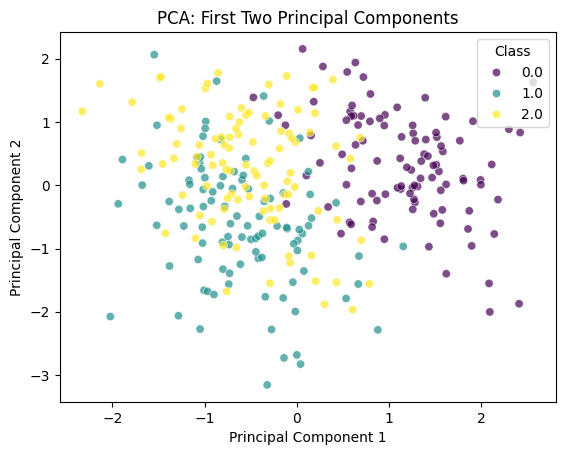

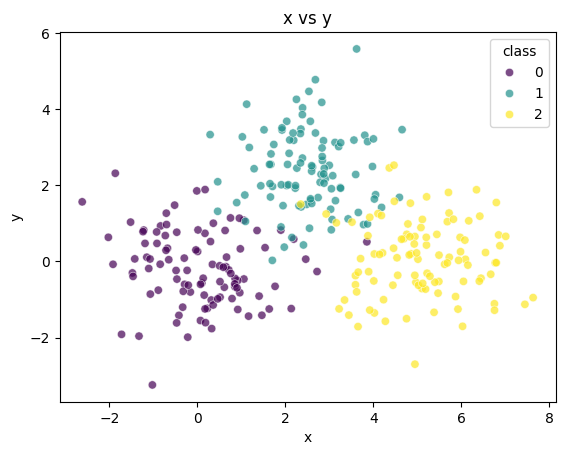

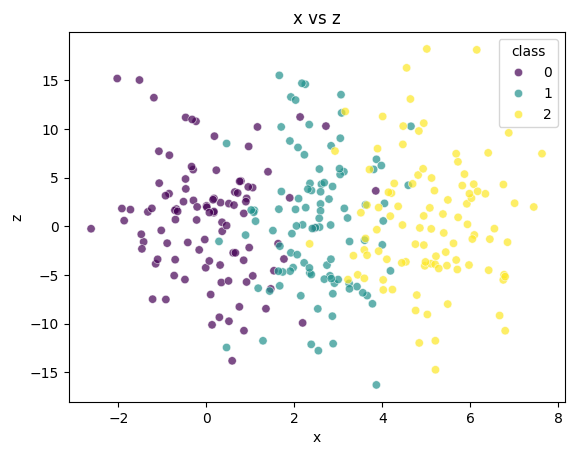

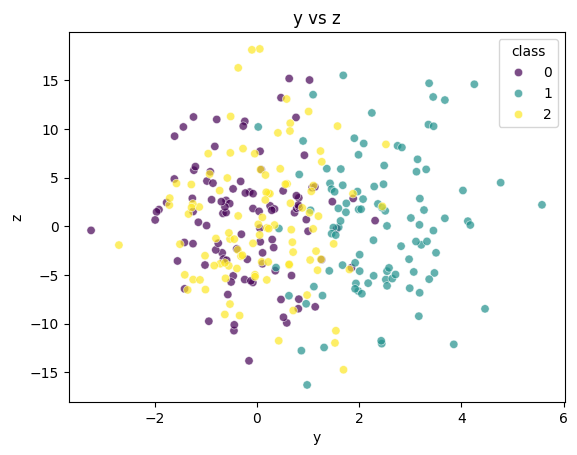

In [5]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import data
df = pd.read_csv('PCA_three_clusters_data.csv')

#prepare data
data = df.to_numpy()
X = np.delete(data, 3, 1)
y = np.delete(data, 0, 1)
y = np.delete(y, 0, 1)
y = np.delete(y, 0, 1)
y = y.T

#normalize X
X = X - np.mean(X, axis = 0)
X = X / np.std(X, axis = 0)

#SVD
U, Sigma, VT = np.linalg.svd(X)

#Sigma -> full diagonal matrix
Sigma_full = np.zeros((X.shape[0], X.shape[1]))
np.fill_diagonal(Sigma_full, Sigma)

variance_estimators = (Sigma ** 2) / (X.shape[0] - 1)

XV = U @ Sigma_full

XV2 = np.delete(XV, 2, 1)
data2 = pd.DataFrame(XV2, columns=['PC1', 'PC2'])
df2 = pd.DataFrame(y.T, columns=['class'])
data2['class'] = df2['class']


#PC1 vs PC2 plot
sns.scatterplot(data=data2, x='PC1', y='PC2', hue=data2['class'], palette='viridis', alpha=0.7)
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class")
plt.show()

#x vs y plot
sns.scatterplot(data=df, x='x', y='y', hue='class', palette='viridis', alpha=0.7)
plt.title("x vs y")
plt.show()

#x vs z plot
sns.scatterplot(data=df, x='x', y='z', hue='class', palette='viridis', alpha=0.7)
plt.title("x vs z")
plt.show()

#y vs z plot
sns.scatterplot(data=df, x='y', y='z', hue='class', palette='viridis', alpha=0.7)
plt.title("y vs z")
plt.show()

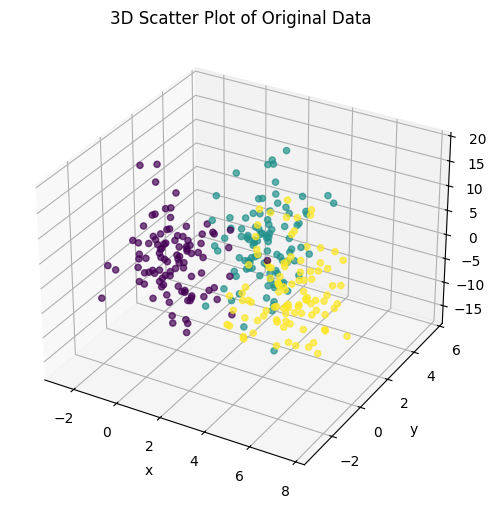

In [6]:
#3d plot to answer primary question
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

plot3d = ax.scatter(df['x'], df['y'], df['z'], c=df['class'], cmap='viridis', alpha=0.7)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("3D Scatter Plot of Original Data")
plt.show()

odpowiedz na primary

odpowiedz na seconadry